# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib
!pip install seaborn

In [4]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# 1. Carregar o dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
data = pd.read_csv(url)
print("Dataset carregado com sucesso.")

# 2. Separar os dados em features (X) e alvo (y)
X = data.drop('win', axis=1)
y = data['win']
print("\nFeatures e alvo separados.")

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nDados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")

# 4. Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures padronizadas.")

# 5. Converter para tensores PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
print("\nDados convertidos para tensores PyTorch.")
print(f"Formato do X_train_tensor: {X_train_tensor.shape}")
print(f"Formato do y_train_tensor: {y_train_tensor.shape}")

Dataset carregado com sucesso.

Features e alvo separados.

Dados divididos em treino (800 amostras) e teste (200 amostras).

Features padronizadas.

Dados convertidos para tensores PyTorch.
Formato do X_train_tensor: torch.Size([800, 8])
Formato do y_train_tensor: torch.Size([800, 1])


In [5]:
data.head(3)

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [6]:
## Write your code here
import torch.nn as nn
import torch.optim as optim

# 1. Definir o Modelo de Regressão Logística
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

# 2. Inicializar o Modelo, Função de Perda e Otimizador
# Obter o número de features de entrada do conjunto de treino
input_dim = X_train.shape[1]

# Inicializar o modelo
model = LogisticRegressionModel(input_dim)

# Definir a função de perda (Binary Cross-Entropy)
criterion = nn.BCELoss()

# Definir o otimizador (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Modelo, função de perda e otimizador foram inicializados com sucesso.")
print("\nArquitetura do Modelo:")
print(model)

Modelo, função de perda e otimizador foram inicializados com sucesso.

Arquitetura do Modelo:
LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [7]:
# Write your code here
# 1. Definir o número de épocas
num_epochs = 1000

print("Iniciando o treinamento do modelo...")
# 2. Loop de Treinamento
for epoch in range(num_epochs):
    model.train() # Coloca o modelo em modo de treinamento
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 3. Imprimir a perda a cada 100 épocas
    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Perda: {loss.item():.4f}')

print("Treinamento concluído.")

# 4. Avaliação do Modelo
model.eval() # Coloca o modelo em modo de avaliação
with torch.no_grad(): # Desabilita o cálculo de gradientes
    # Previsões para os dados de treino
    train_outputs = model(X_train_tensor)
    predicted_train = (train_outputs >= 0.5).float()
    train_accuracy = (predicted_train == y_train_tensor).sum().item() / len(y_train_tensor)

    # Previsões para os dados de teste
    test_outputs = model(X_test_tensor)
    predicted_test = (test_outputs >= 0.5).float()
    test_accuracy = (predicted_test == y_test_tensor).sum().item() / len(y_test_tensor)

# 6. Imprimir a Acurácia
print(f'\nAcurácia no conjunto de treino: {train_accuracy * 100:.2f}%')
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Iniciando o treinamento do modelo...
Época [100/1000], Perda: 0.7179
Época [200/1000], Perda: 0.7051
Época [300/1000], Perda: 0.6972
Época [400/1000], Perda: 0.6925
Época [500/1000], Perda: 0.6896
Época [600/1000], Perda: 0.6879
Época [700/1000], Perda: 0.6868
Época [800/1000], Perda: 0.6862
Época [900/1000], Perda: 0.6858
Época [1000/1000], Perda: 0.6856
Treinamento concluído.

Acurácia no conjunto de treino: 53.00%
Acurácia no conjunto de teste: 48.50%


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [8]:
## Write your code here
# Inicializar um novo modelo para o treinamento com regularização
model_l2 = LogisticRegressionModel(input_dim)

# 1. Configurar o Otimizador com Regularização L2
# O parâmetro weight_decay adiciona a penalidade L2
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)

print("Iniciando o treinamento do modelo com regularização L2...")
# 2. Treinar o Modelo com Regularização L2
num_epochs = 1000
for epoch in range(num_epochs):
    model_l2.train()
    
    # Forward pass
    outputs = model_l2(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass e otimização
    optimizer_l2.zero_grad()
    loss.backward()
    optimizer_l2.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Perda: {loss.item():.4f}')

print("Treinamento com L2 concluído.")

# 3. Avaliar o Modelo Otimizado
model_l2.eval()
with torch.no_grad():
    # Previsões para treino
    train_outputs_l2 = model_l2(X_train_tensor)
    predicted_train_l2 = (train_outputs_l2 >= 0.5).float()
    train_accuracy_l2 = (predicted_train_l2 == y_train_tensor).sum().item() / len(y_train_tensor)

    # Previsões para teste
    test_outputs_l2 = model_l2(X_test_tensor)
    predicted_test_l2 = (test_outputs_l2 >= 0.5).float()
    test_accuracy_l2 = (predicted_test_l2 == y_test_tensor).sum().item() / len(y_test_tensor)

# 4. Calcular e Imprimir a Acurácia
print(f'\nAcurácia no conjunto de treino (com L2): {train_accuracy_l2 * 100:.2f}%')
print(f'Acurácia no conjunto de teste (com L2): {test_accuracy_l2 * 100:.2f}%')

Iniciando o treinamento do modelo com regularização L2...
Época [100/1000], Perda: 0.7036
Época [200/1000], Perda: 0.6968
Época [300/1000], Perda: 0.6925
Época [400/1000], Perda: 0.6898
Época [500/1000], Perda: 0.6880
Época [600/1000], Perda: 0.6870
Época [700/1000], Perda: 0.6863
Época [800/1000], Perda: 0.6859
Época [900/1000], Perda: 0.6856
Época [1000/1000], Perda: 0.6855
Treinamento com L2 concluído.

Acurácia no conjunto de treino (com L2): 54.50%
Acurácia no conjunto de teste (com L2): 50.50%


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


--- Relatório de Classificação ---
              precision    recall  f1-score   support

 Derrota (0)       0.47      0.40      0.43        95
 Vitória (1)       0.53      0.60      0.56       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200


--- Matriz de Confusão ---


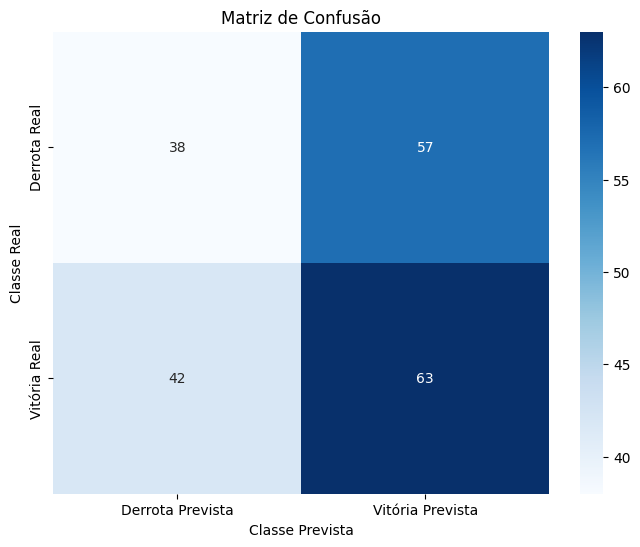


--- Curva ROC e AUC ---
Área Sob a Curva (AUC): 0.5030


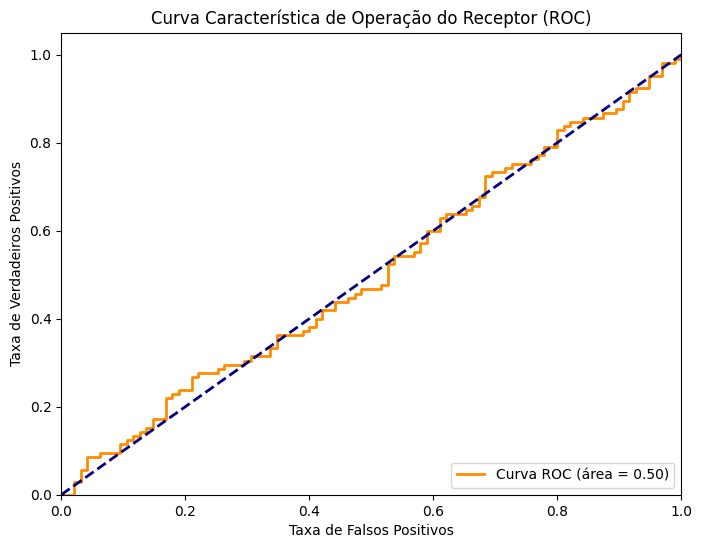

In [9]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Nota: Este código assume que as variáveis e o modelo 'model_l2' do Exercício 4
# estão disponíveis no ambiente.

# Colocar o modelo em modo de avaliação
model_l2.eval()

# Fazer previsões no conjunto de teste
with torch.no_grad():
    y_pred_tensor = model_l2(X_test_tensor)

# Converter tensores para arrays NumPy para usar com scikit-learn
# .numpy() converte um tensor da CPU para um array NumPy
y_true_np = y_test_tensor.numpy()
# Probabilidades previstas
y_pred_proba_np = y_pred_tensor.numpy()
# Converter probabilidades em classes (0 ou 1) com um limiar de 0.5
y_pred_class_np = (y_pred_proba_np >= 0.5).astype(int)

# --- 1. Relatório de Classificação ---
print("--- Relatório de Classificação ---")
# Gera um relatório de texto com as principais métricas de classificação. [5, 7, 9, 11, 13]
report = classification_report(y_true_np, y_pred_class_np, target_names=['Derrota (0)', 'Vitória (1)'])
print(report)


# --- 2. Matriz de Confusão ---
print("\n--- Matriz de Confusão ---")
# Calcula a matriz de confusão
cm = confusion_matrix(y_true_np, y_pred_class_np)

# Plotar a matriz de confusão usando um mapa de calor para melhor visualização. [4, 12]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Derrota Prevista', 'Vitória Prevista'],
            yticklabels=['Derrota Real', 'Vitória Real'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()


# --- 3. Curva ROC e AUC ---
print("\n--- Curva ROC e AUC ---")
# Calcular a taxa de falsos positivos (FPR), a taxa de verdadeiros positivos (TPR) e os limiares. [6, 8, 10]
fpr, tpr, thresholds = roc_curve(y_true_np, y_pred_proba_np)

# Calcular a Área Sob a Curva (AUC). [3]
roc_auc = auc(fpr, tpr)
print(f"Área Sob a Curva (AUC): {roc_auc:.4f}")

# Plotar a Curva ROC. [2, 6]
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Linha de referência (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [11]:
## Write your code here
# Para garantir que o código seja executável, vamos redefinir a classe do modelo aqui
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# --- 1. Salvando o Modelo ---
# Definir o caminho do arquivo para salvar o modelo
MODEL_PATH = 'logistic_regression_model.pth'

# Salvar apenas o dicionário de estado (parâmetros aprendidos) do modelo.
torch.save(model_l2.state_dict(), MODEL_PATH)

print(f"Modelo treinado salvo com sucesso em: {MODEL_PATH}")


# --- 2. Carregando o Modelo ---
# Criar uma nova instância do modelo. Esta é uma instância não treinada.
loaded_model = LogisticRegressionModel(input_dim)
print("\nNova instância do modelo (não treinada) foi criada.")

# Carregar o dicionário de estado salvo na nova instância do modelo.
loaded_model.load_state_dict(torch.load(MODEL_PATH))

print(f"Parâmetros do modelo carregados de: {MODEL_PATH}")


# --- 3. Avaliando o Modelo Carregado ---
# Colocar o modelo carregado em modo de avaliação.
# Isso é importante para desativar camadas como Dropout ou BatchNorm, se existirem.
loaded_model.eval()

print("\nAvaliando o desempenho do modelo carregado no conjunto de teste...")

# Usar torch.no_grad() para desabilitar o cálculo de gradientes durante a avaliação.
with torch.no_grad():
    # Fazer previsões com o modelo carregado
    y_pred_loaded = loaded_model(X_test_tensor)
    
    # Converter as probabilidades de saída em classes previstas (0 ou 1)
    predicted_loaded = (y_pred_loaded >= 0.5).float()
    
    # Calcular a acurácia
    correct_predictions = (predicted_loaded == y_test_tensor).sum().item()
    total_samples = y_test_tensor.size(0)
    loaded_model_accuracy = (correct_predictions / total_samples) * 100

print(f'\nAcurácia do modelo carregado no conjunto de teste: {loaded_model_accuracy:.2f}%')
print("A avaliação confirma que o modelo foi carregado corretamente e mantém seu desempenho.")


Modelo treinado salvo com sucesso em: logistic_regression_model.pth

Nova instância do modelo (não treinada) foi criada.
Parâmetros do modelo carregados de: logistic_regression_model.pth

Avaliando o desempenho do modelo carregado no conjunto de teste...

Acurácia do modelo carregado no conjunto de teste: 50.50%
A avaliação confirma que o modelo foi carregado corretamente e mantém seu desempenho.


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [12]:
## Write your code here
# 1. Definir as Taxas de Aprendizado para testar
learning_rates = [0.01, 0.05, 0.1]
num_epochs_tuning = 100 # Usar um número menor de épocas para o ajuste
results = {}

print(f"Iniciando o ajuste de hiperparâmetros para as taxas de aprendizado: {learning_rates}")
print("-" * 60)

# Loop sobre cada taxa de aprendizado
for lr in learning_rates:
    print(f"Treinando com a taxa de aprendizado (lr): {lr}")
    
    # 2. Reinicializar o Modelo e o Otimizador para cada taxa de aprendizado
    model_tune = LogisticRegressionModel(input_dim)
    optimizer_tune = torch.optim.SGD(model_tune.parameters(), lr=lr)
    criterion_tune = nn.BCELoss()

    # 3. Treinar o Modelo
    for epoch in range(num_epochs_tuning):
        model_tune.train()
        
        # Forward pass
        outputs = model_tune(X_train_tensor)
        loss = criterion_tune(outputs, y_train_tensor)
        
        # Backward e otimização
        optimizer_tune.zero_grad()
        loss.backward()
        optimizer_tune.step()

    print("Treinamento concluído.")
    
    # 4. Avaliar o modelo no conjunto de teste
    model_tune.eval()
    with torch.no_grad():
        test_outputs = model_tune(X_test_tensor)
        predicted = (test_outputs >= 0.5).float()
        
        correct = (predicted == y_test_tensor).sum().item()
        total = y_test_tensor.size(0)
        accuracy = (correct / total) * 100
        
        # Armazenar a acurácia
        results[lr] = accuracy
        print(f"Acurácia no teste para lr={lr}: {accuracy:.2f}%\n")

# --- Identificar e relatar a melhor taxa de aprendizado ---
# Encontrar a chave (lr) com o maior valor (acurácia) no dicionário de resultados
best_lr = max(results, key=results.get)
best_accuracy = results[best_lr]

print("-" * 60)
print("Resultados do Ajuste de Hiperparâmetros:")
for lr, acc in results.items():
    print(f"  - Taxa de Aprendizado: {lr}, Acurácia no Teste: {acc:.2f}%")

print(f"\nA melhor taxa de aprendizado encontrada foi {best_lr} com uma acurácia de {best_accuracy:.2f}%.")


Iniciando o ajuste de hiperparâmetros para as taxas de aprendizado: [0.01, 0.05, 0.1]
------------------------------------------------------------
Treinando com a taxa de aprendizado (lr): 0.01
Treinamento concluído.
Acurácia no teste para lr=0.01: 52.00%

Treinando com a taxa de aprendizado (lr): 0.05
Treinamento concluído.
Acurácia no teste para lr=0.05: 52.00%

Treinando com a taxa de aprendizado (lr): 0.1
Treinamento concluído.
Acurácia no teste para lr=0.1: 51.00%

------------------------------------------------------------
Resultados do Ajuste de Hiperparâmetros:
  - Taxa de Aprendizado: 0.01, Acurácia no Teste: 52.00%
  - Taxa de Aprendizado: 0.05, Acurácia no Teste: 52.00%
  - Taxa de Aprendizado: 0.1, Acurácia no Teste: 51.00%

A melhor taxa de aprendizado encontrada foi 0.01 com uma acurácia de 52.00%.


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  



Top 10 Features Mais Importantes:
        Feature  Importance  Absolute Importance
3   gold_earned    0.178588             0.178588
0         kills    0.134552             0.134552
5  wards_placed    0.110327             0.110327
6  wards_killed   -0.062676             0.062676
1        deaths   -0.024896             0.024896
7  damage_dealt   -0.024082             0.024082
4            cs    0.020654             0.020654
2       assists   -0.016779             0.016779


/tmp/ipykernel_299/801405094.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


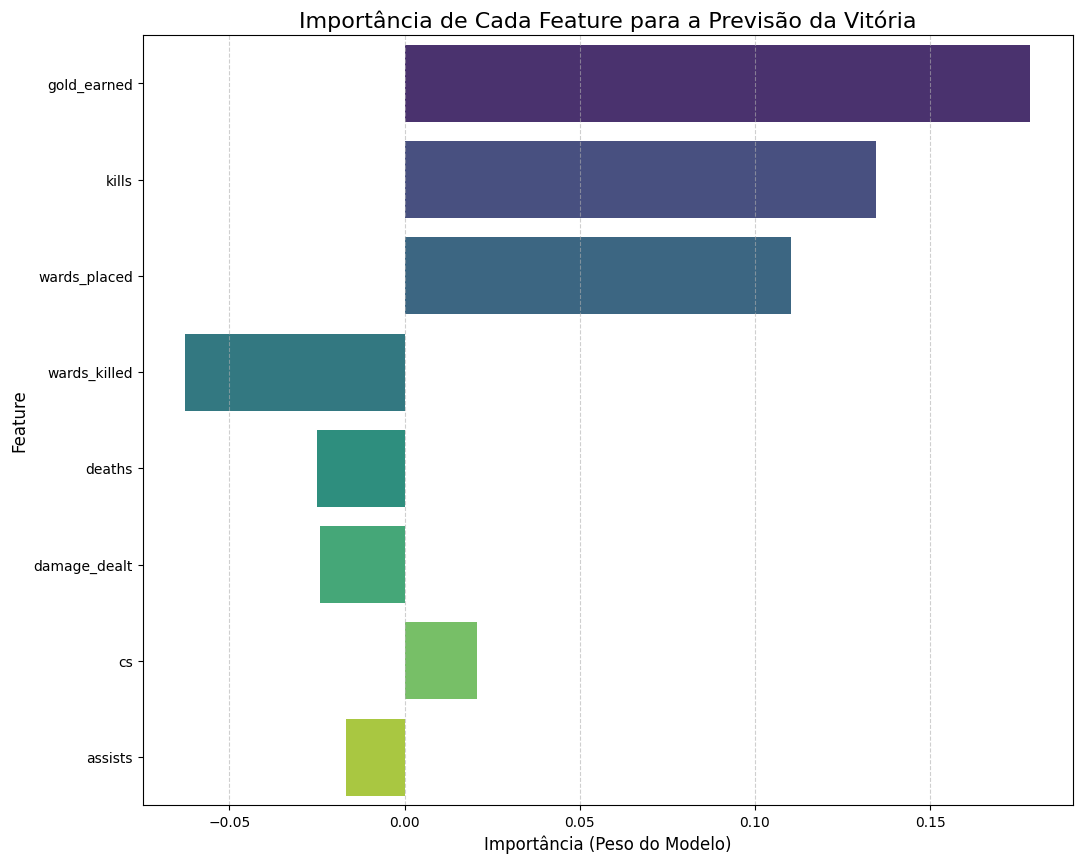

In [13]:
import numpy as np

weights = model_l2.linear.weight.detach().numpy().flatten()
feature_names = X.columns # Nomes das colunas do DataFrame original

# 2. Criar um DataFrame com as Features e suas Importâncias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': weights
})

# 3. Ordenar as Features pela Importância Absoluta
# Criamos uma coluna com o valor absoluto para ordenar e encontrar as features mais impactantes,
# independentemente de a correlação ser positiva ou negativa.
feature_importance_df['Absolute Importance'] = np.abs(feature_importance_df['Importance'])
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='Absolute Importance',
    ascending=False
)

# Exibir as 10 features mais importantes
print("\nTop 10 Features Mais Importantes:")
print(sorted_feature_importance_df.head(10))

# 4. Plotar a Importância das Features
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=sorted_feature_importance_df,
    palette='viridis'
)
plt.title('Importância de Cada Feature para a Previsão da Vitória', fontsize=16)
plt.xlabel('Importância (Peso do Modelo)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
